<h2><b>EDA</b> PCOS Alimentación</h2>

En este análisis exploratorio se estudia la posible relación entre el Síndrome de Ovario Poliquístico (PCOS) y los hábitos alimenticios de las participantes. El PCOS es un trastorno hormonal frecuente en mujeres en edad reproductiva, caracterizado por irregularidades menstruales, exceso de andrógenos y alteraciones metabólicas. Dado que la alimentación influye en la resistencia a la insulina, el peso corporal y el equilibrio hormonal, resulta relevante examinar cómo los patrones dietéticos pueden estar asociados con la presencia o ausencia del síndrome.

Para ello, los hábitos alimentarios se clasificaron según la frecuencia semanal de consumo de distintos alimentos o grupos alimenticios, empleando una escala numérica estandarizada que facilita el análisis cuantitativo:

0 veces a la semana → 0

1–2 veces a la semana → 0.25

3–4 veces a la semana → 0.5

5–6 veces a la semana → 0.75

Todos los días de la semana → 1

Esta codificación permite normalizar las variables categóricas de frecuencia de consumo, lo que facilita la comparación entre grupos (PCOS = Sí / No) y el uso de técnicas estadísticas o visualizaciones para identificar tendencias y patrones en la dieta de las participantes.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/pcos_diet.csv')
df

,Unnamed: 0,PCOS,Diet_Bread_Cereals,Diet_Fruits,Diet_Vegetables,Diet_Starchy_Vegetables,Diet_NonStarchy_Vegetables,Diet_Milk_Products,Diet_Fats,Diet_Sweets,Diet_Fried_Food,Diet_Tea_Coffee,Diet_Multivitamin,Vegetarian
0,0,0.0,1.00,0.25,0.25,0.50,0.25,1.00,1.00,0.50,0.50,1.00,0.00,0.0
1,1,0.0,0.50,0.50,0.50,0.50,0.25,0.50,0.50,0.00,0.25,0.00,0.00,0.0
2,2,0.0,0.75,0.25,0.50,0.25,0.25,0.25,1.00,0.25,0.50,1.00,0.00,0.0
3,3,0.0,0.25,0.25,0.25,0.75,0.50,0.50,0.75,0.75,0.75,1.00,0.25,0.0
4,4,0.0,0.50,0.25,0.50,0.50,0.50,1.00,0.75,0.25,0.50,0.75,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,0.0,1.00,1.00,0.75,0.50,0.25,0.75,0.50,0.25,0.25,1.00,0.00,0.0
169,169,1.0,0.25,0.25,0.25,0.25,0.00,0.25,0.25,0.25,0.25,0.25,0.00,0.0
170,170,1.0,1.00,0.50,0.75,1.00,0.75,0.50,1.00,1.00,0.25,0.25,0.25,0.0
171,171,0.0,0.50,0.25,0.25,0.50,0.25,0.00,0.25,0.25,0.25,1.00,0.00,0.0


In [26]:
#Detectar todas las columnas de dieta automáticamente
diet_cols = [col for col in df.columns if col.startswith("Diet_")]

#Diccionario para traducir los valores numéricos
niveles = {
    0.00: "Nunca",
    0.25: "1–2 veces/sem",
    0.50: "3–4 veces/sem",
    0.75: "5–6 veces/sem",
    1.00: "Todos los días"}

#Recorremos cada alimento
for col in diet_cols:
    print(f"\n{col}:")
    
    #Eliminamos filas vacías
    temp = df.dropna(subset=[col])
    
    #Calculamos el % de PCOS en cada nivel de consumo
    pcos_por_nivel = temp.groupby(col)["PCOS"].mean() * 100
    
    #Redondeamos y mostramos con etiquetas
    for nivel, valor in pcos_por_nivel.round(2).items():
        etiqueta = niveles.get(round(nivel, 2), nivel)
        print(f"  {etiqueta}: {valor:.2f}% con PCOS")


Diet_Bread_Cereals:
  Nunca: 0.00% con PCOS
  1–2 veces/sem: 24.00% con PCOS
  3–4 veces/sem: 20.00% con PCOS
  5–6 veces/sem: 25.00% con PCOS
  Todos los días: 21.65% con PCOS

Diet_Fruits:
  Nunca: 30.77% con PCOS
  1–2 veces/sem: 23.19% con PCOS
  3–4 veces/sem: 23.08% con PCOS
  5–6 veces/sem: 26.32% con PCOS
  Todos los días: 5.26% con PCOS

Diet_Vegetables:
  Nunca: 60.00% con PCOS
  1–2 veces/sem: 19.23% con PCOS
  3–4 veces/sem: 21.74% con PCOS
  5–6 veces/sem: 20.59% con PCOS
  Todos los días: 25.00% con PCOS

Diet_Starchy_Vegetables:
  Nunca: 14.29% con PCOS
  1–2 veces/sem: 21.21% con PCOS
  3–4 veces/sem: 21.88% con PCOS
  5–6 veces/sem: 18.18% con PCOS
  Todos los días: 38.46% con PCOS

Diet_NonStarchy_Vegetables:
  Nunca: 23.81% con PCOS
  1–2 veces/sem: 20.27% con PCOS
  3–4 veces/sem: 23.21% con PCOS
  5–6 veces/sem: 22.22% con PCOS
  Todos los días: 33.33% con PCOS

Diet_Milk_Products:
  Nunca: 23.53% con PCOS
  1–2 veces/sem: 19.61% con PCOS
  3–4 veces/sem: 28.95% c

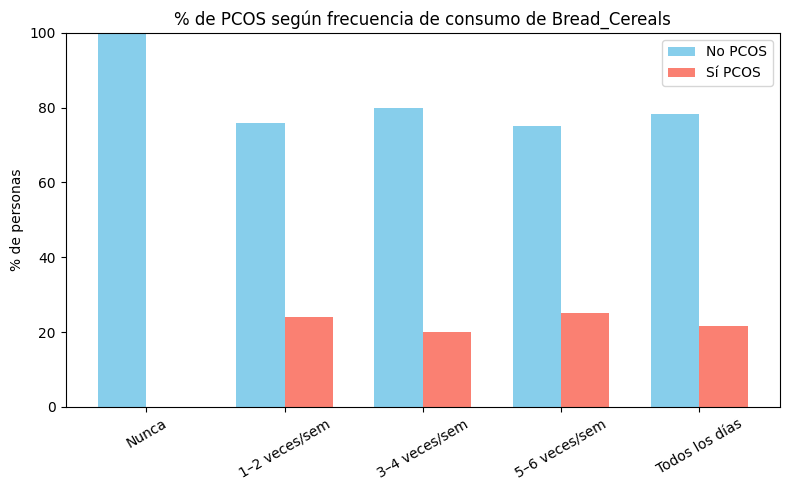

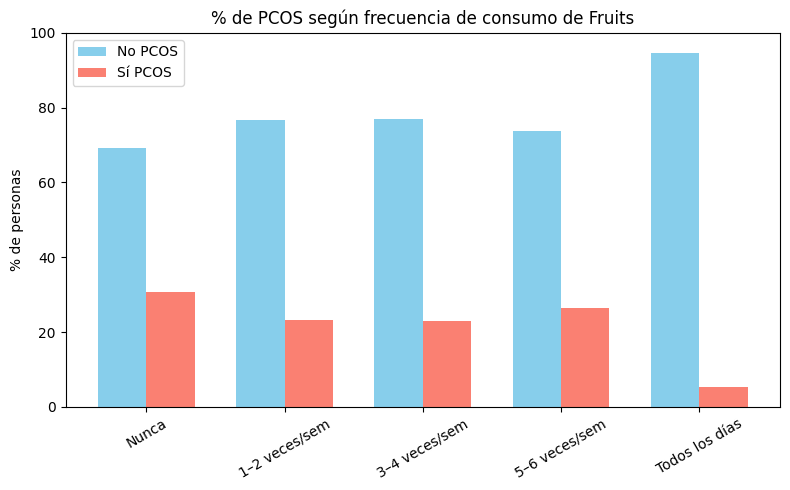

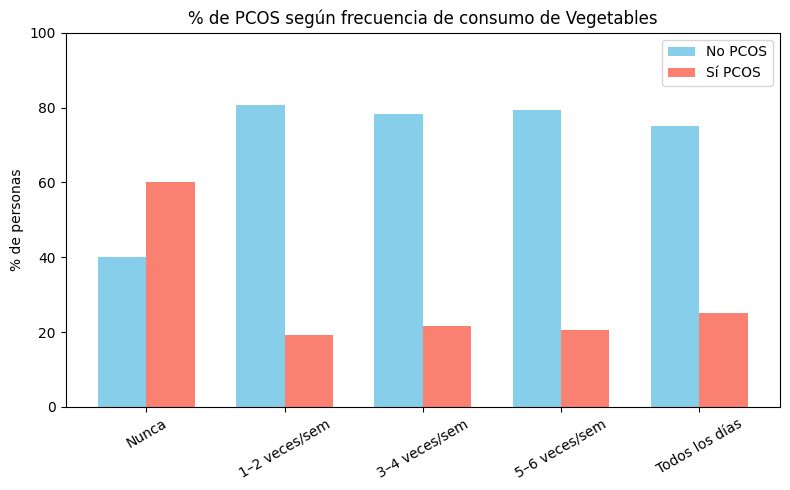

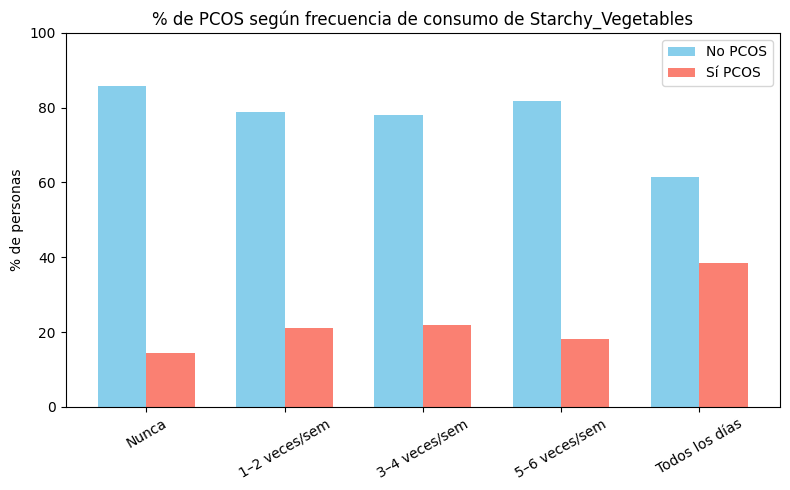

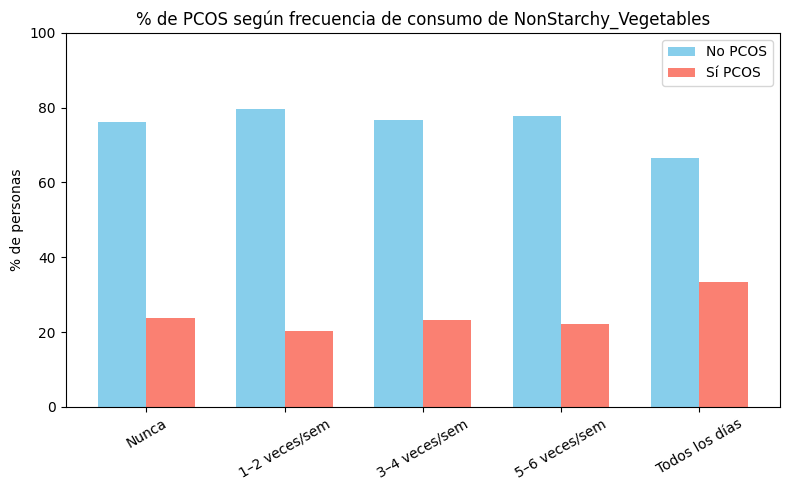

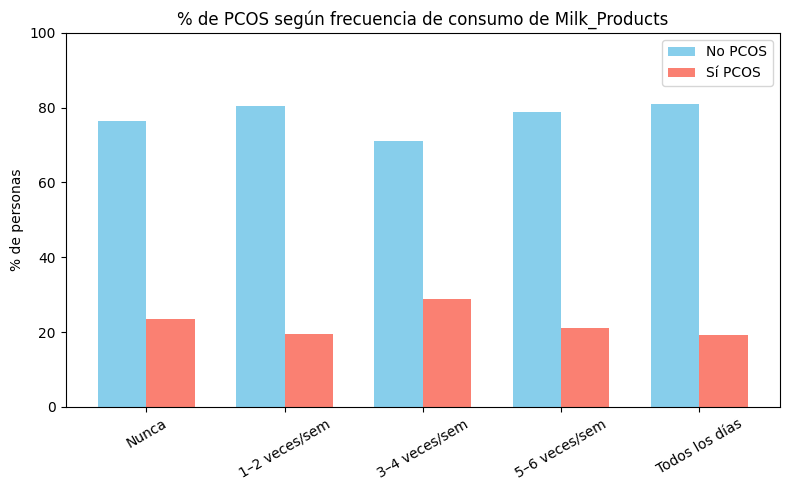

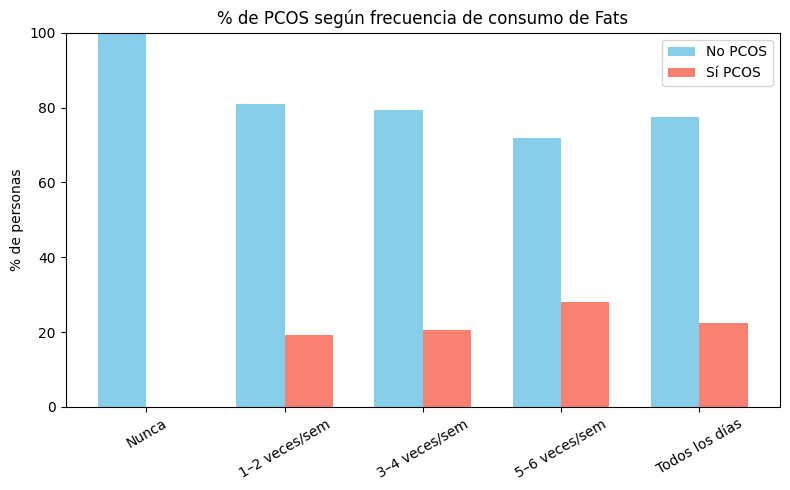

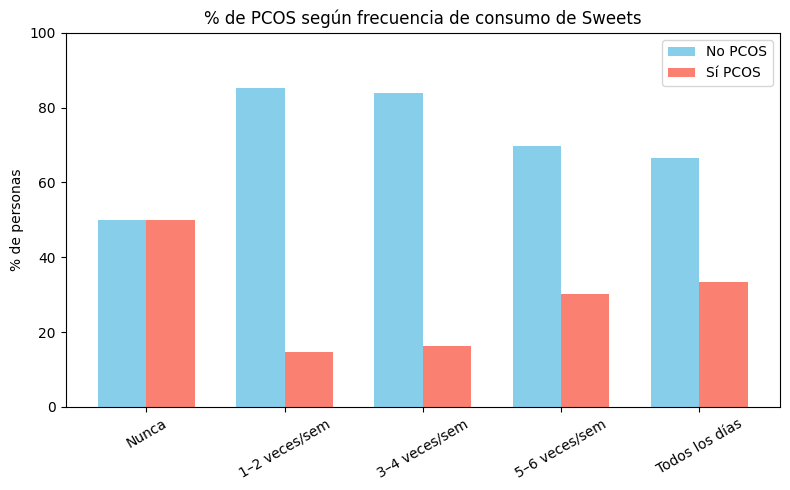

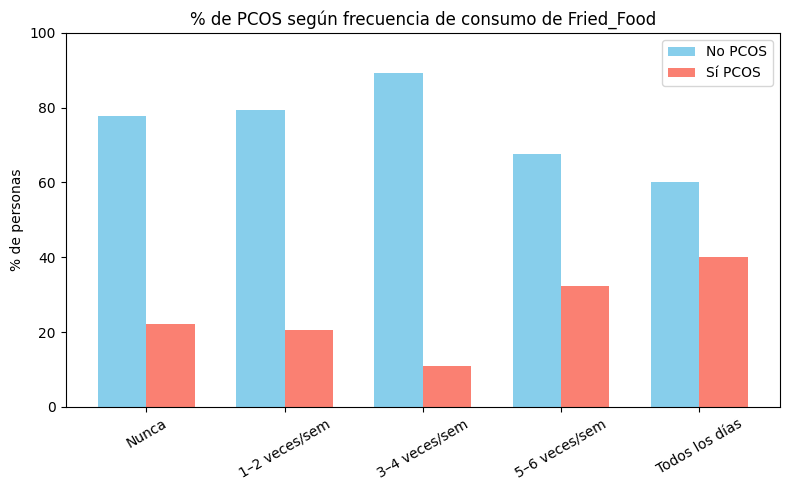

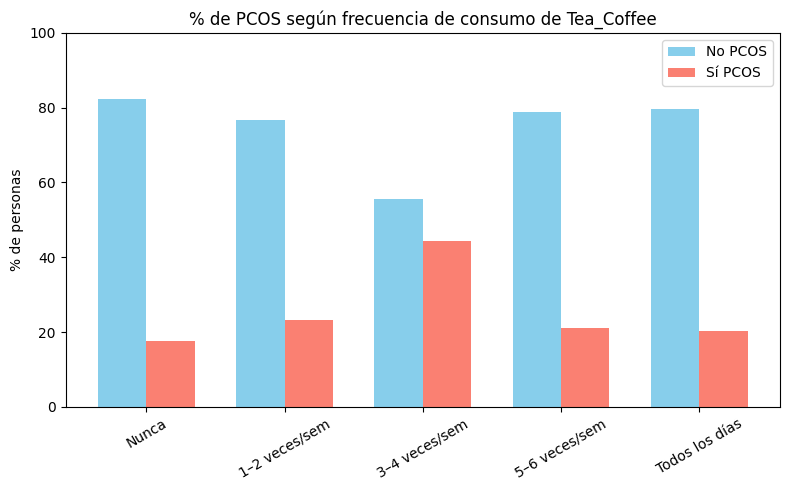

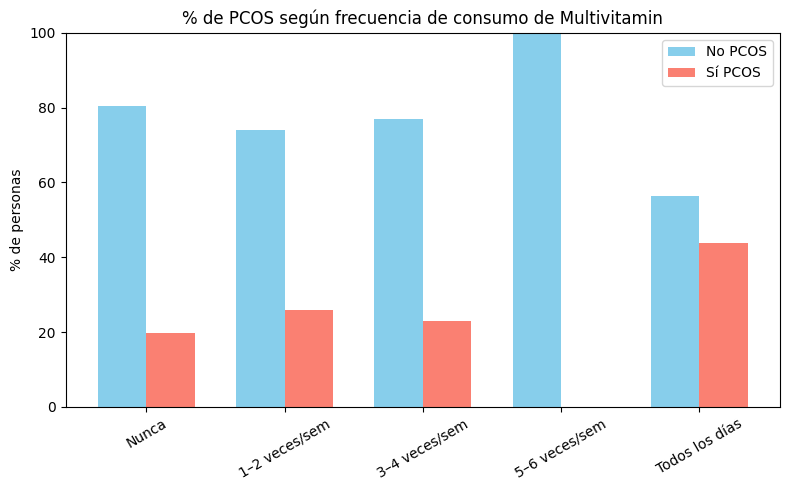

In [27]:
#Detectamos todas las columnas de dieta automáticamente
diet_cols = [c for c in df.columns if c.startswith("Diet_")]
medias = df.groupby("PCOS")[diet_cols].mean().T
medias.columns = medias.columns.map({0: "No", 1: "Si"})
medias
correlaciones = df[diet_cols + ["PCOS"]].corr(numeric_only=True)["PCOS"].sort_values(ascending=False)
for col in diet_cols:
    temp = df.dropna(subset=[col])
    
    #Conteo de PCOS por nivel de consumo
    conteo = temp.groupby([col, "PCOS"]).size().unstack(fill_value=0)
    
    #Pasar a porcentaje por nivel de consumo
    porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
    
    #Traducción de etiquetas
    etiquetas = [niveles.get(round(n, 2), str(n)) for n in porcentaje.index]
    
    #Posición de las barras
    x = np.arange(len(etiquetas))
    ancho = 0.35  # ancho de cada barra
    
    plt.figure(figsize=(8, 5))
    plt.bar(x - ancho/2, porcentaje[0], width=ancho, label="No PCOS", color="skyblue")
    plt.bar(x + ancho/2, porcentaje[1], width=ancho, label="Sí PCOS", color="salmon")
    
    plt.xticks(x, etiquetas, rotation=30)
    plt.ylabel("% de personas")
    plt.title(f"% de PCOS según frecuencia de consumo de {col.replace('Diet_', '')}")
    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [28]:
#Agrupamos por PCOS y sacamos la media de cada alimento
#.T = transponer para que se vea mejor
medias = df.groupby("PCOS")[diet_cols].mean().T
medias.columns = medias.columns.map({0: "No", 1: "Si"})
medias

PCOS,No,Si
Diet_Bread_Cereals,0.777985,0.776316
Diet_Fruits,0.460821,0.388158
Diet_Vegetables,0.498134,0.480263
Diet_Starchy_Vegetables,0.444030,0.486842
Diet_NonStarchy_Vegetables,0.363806,0.375000
Diet_Milk_Products,0.544776,0.526316
Diet_Fats,0.636194,0.671053
Diet_Sweets,0.501866,0.605263
Diet_Fried_Food,0.449627,0.532895
Diet_Tea_Coffee,0.664179,0.644737


In [29]:
correlaciones = df[diet_cols + ["PCOS"]].corr(numeric_only=True)["PCOS"].sort_values(ascending=False)
print("Correlaciones con PCOS:")
print(correlaciones)
print('__________')
print('Esto no prueba causalidad, pero sí indica qué tan relacionado está cada alimento con tener PCOS.')

Correlaciones con PCOS:
PCOS                          1.000000
Diet_Sweets                   0.146697
Diet_Fried_Food               0.129716
Diet_Multivitamin             0.098223
Diet_Starchy_Vegetables       0.073196
Diet_Fats                     0.047231
Diet_NonStarchy_Vegetables    0.020680
Diet_Bread_Cereals           -0.002401
Diet_Tea_Coffee              -0.021273
Diet_Milk_Products           -0.022409
Diet_Vegetables              -0.031352
Diet_Fruits                  -0.109758
Name: PCOS, dtype: float64
__________
Esto no prueba causalidad, pero sí indica qué tan relacionado está cada alimento con tener PCOS.


In [30]:
#Seleccionar solo variables numéricas
num_df = df.select_dtypes(include=['float64', 'int64'])

#Calcular la matriz de correlación
corr = num_df.corr()

#Mostrar la tabla de correlaciones
print("Tabla de correlaciones:\n")
print(corr['PCOS'].sort_values(ascending=False))

Tabla de correlaciones:

PCOS                          1.000000
Diet_Sweets                   0.146697
Diet_Fried_Food               0.129716
Unnamed: 0                    0.102566
Diet_Multivitamin             0.098223
Diet_Starchy_Vegetables       0.073196
Diet_Fats                     0.047231
Diet_NonStarchy_Vegetables    0.020680
Diet_Bread_Cereals           -0.002401
Vegetarian                   -0.015594
Diet_Tea_Coffee              -0.021273
Diet_Milk_Products           -0.022409
Diet_Vegetables              -0.031352
Diet_Fruits                  -0.109758
Name: PCOS, dtype: float64


In [34]:
df = df.copy()
df["PCOS"] = pd.to_numeric(df["PCOS"], errors="coerce")

#Columnas de dieta
diet_cols = [col for col in df.columns if col.startswith("Diet_")]

#Traducción de valores numéricos a etiquetas
niveles = {0.00: "Nunca", 0.25: "1–2 veces/sem", 0.50: "3–4 veces/sem", 0.75: "5–6 veces/sem", 1.00: "Todos los días"}

#Colores personalizados
colores = ["salmon", "lightgreen", "lightblue", "orange", "violet", "cyan"]

#Crear dataframes para cada grupo
resultados_pcos1 = pd.DataFrame()
resultados_pcos0 = pd.DataFrame()

for col in diet_cols:
    temp = df.dropna(subset=[col])

    #Grupo PCOS = 1
    temp_pcos1 = temp[temp["PCOS"] == 1]
    freq1 = temp_pcos1[col].value_counts(normalize=True) * 100
    freq1.index = [niveles.get(round(i, 2), str(i)) for i in freq1.index]
    resultados_pcos1[col.replace("Diet_", "")] = freq1

    #Grupo PCOS = 0
    temp_pcos0 = temp[temp["PCOS"] == 0]
    freq0 = temp_pcos0[col].value_counts(normalize=True) * 100
    freq0.index = [niveles.get(round(i, 2), str(i)) for i in freq0.index]
    resultados_pcos0[col.replace("Diet_", "")] = freq0
    print(resultados_pcos0, resultados_pcos1)

                Bread_Cereals
Todos los días      56.716418
3–4 veces/sem       14.925373
1–2 veces/sem       14.179104
5–6 veces/sem       13.432836
Nunca                0.746269                 Bread_Cereals
Todos los días      55.263158
1–2 veces/sem       15.789474
5–6 veces/sem       15.789474
3–4 veces/sem       13.157895
                Bread_Cereals     Fruits
Todos los días      56.716418  13.432836
3–4 veces/sem       14.925373  29.850746
1–2 veces/sem       14.179104  39.552239
5–6 veces/sem       13.432836  10.447761
Nunca                0.746269   6.716418                 Bread_Cereals     Fruits
Todos los días      55.263158   2.631579
1–2 veces/sem       15.789474  42.105263
5–6 veces/sem       15.789474  13.157895
3–4 veces/sem       13.157895  31.578947
                Bread_Cereals     Fruits  Vegetables
Todos los días      56.716418  13.432836    6.716418
3–4 veces/sem       14.925373  29.850746   40.298507
1–2 veces/sem       14.179104  39.552239   31.343284
5–6 vec

C:\Users\anear\AppData\Local\Temp\ipykernel_8496\1649240505.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resultados_pcos1 = resultados_pcos1.reindex(orden_niveles).applymap(
C:\Users\anear\AppData\Local\Temp\ipykernel_8496\1649240505.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  resultados_pcos0 = resultados_pcos0.reindex(orden_niveles).applymap(


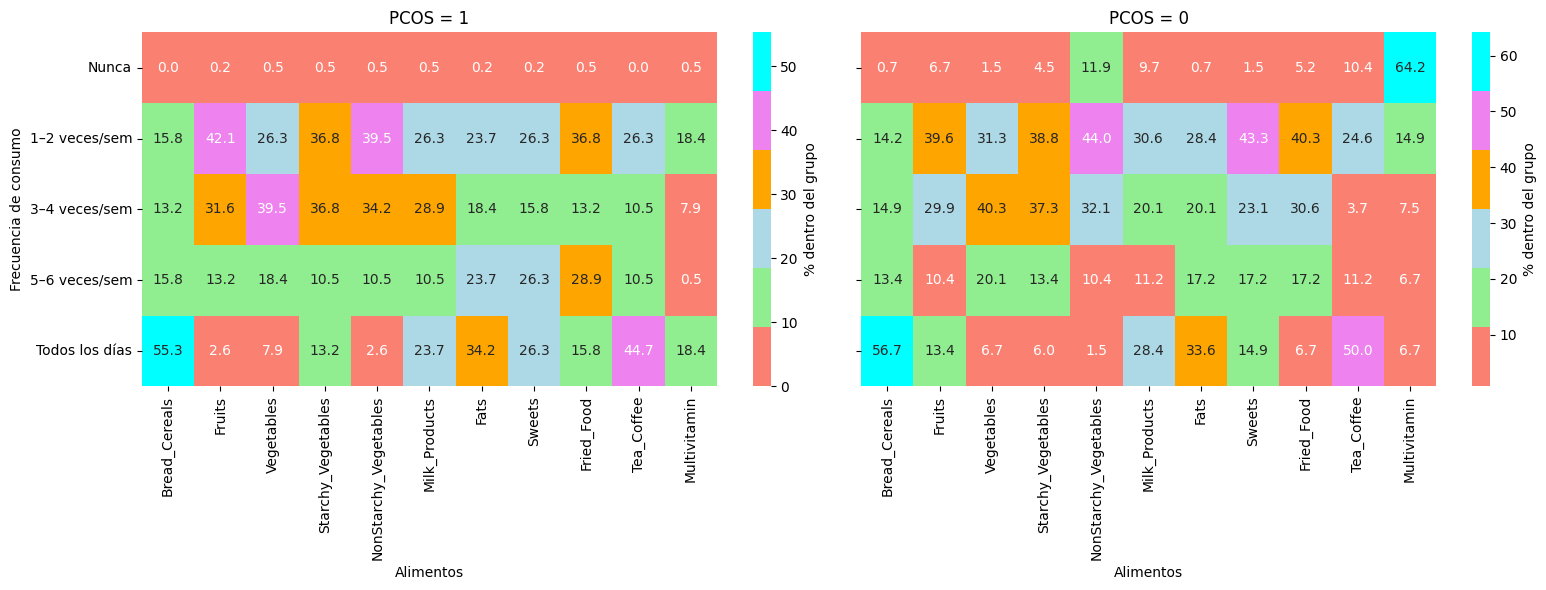

In [ ]:
#Ordenar filas
orden_niveles = list(niveles.values())
resultados_pcos1 = resultados_pcos1.reindex(orden_niveles)
resultados_pcos0 = resultados_pcos0.reindex(orden_niveles)

#Heatmap comparativo
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.heatmap(resultados_pcos1, ax=axes[0], annot=True, fmt=".1f",
            cmap=sns.color_palette(colores), cbar_kws={'label': '% dentro del grupo'})
axes[0].set_title("PCOS = 1")
axes[0].set_xlabel("Alimentos")
axes[0].set_ylabel("Frecuencia de consumo")

sns.heatmap(resultados_pcos0, ax=axes[1], annot=True, fmt=".1f",
            cmap=sns.color_palette(colores), cbar_kws={'label': '% dentro del grupo'})
axes[1].set_title("PCOS = 0")
axes[1].set_xlabel("Alimentos")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()